In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def parse(npz_arr):
    return npz_arr["predictions"], npz_arr["targets"]

def nll(outputs, labels):
    labels = labels.astype(int)
    idx = (np.arange(labels.size), labels)
    ps = outputs[idx]
    nll = -np.sum(np.log(ps))
    return nll

def nll_from_arr(npz_arr, name="", print_name=False):
    all_outputs, labels = parse(npz_arr)
    outputs = np.sum(all_outputs, 2)
    if outputs is None:
        nll = None
    else:
        labels = labels.astype(int)
        idx = (np.arange(labels.size), labels)
        ps = outputs[idx]
        nll = -np.sum(np.log(ps))
    if print_name:
        print(name, end=": ")
    if nll is not None:
        print("%.3f"%nll)
    else:
        print("-")
    return nll

In [3]:
def accuracy(npz_arr, name="", print_name=False):
    outputs, labels = parse(npz_arr)
    
    if outputs is None:
        acc = None
    else:
        pred_probs = np.sum(outputs, 2)
        acc = np.mean(np.argmax(pred_probs, axis=1) == labels)
    if print_name:
        print(name, end=": ")
    if acc is not None:
        print("%.4f"%acc)
    else:
        print("-")
    return acc

In [4]:
npz_locations = 'rank_experiment/swag/'

In [5]:
swag_nll = []
swag_acc = []
for epoch in range(163,326):
        npz_arr = np.load(npz_locations+str(epoch)+'.npz')
        swag_nll.append( nll_from_arr(npz_arr) / 10000 )
        swag_acc.append( accuracy(npz_arr))

9582.432
0.7223
9021.226
0.7395
8706.013
0.7480
8613.429
0.7484
8480.214
0.7518
8441.128
0.7546
8364.406
0.7551
8316.363
0.7575
8256.242
0.7591
8232.731
0.7575
8225.362
0.7589
8203.508
0.7578
8190.591
0.7600
8183.817
0.7619
8221.173
0.7617
8225.716
0.7630
8166.530
0.7641
8203.158
0.7627
8159.058
0.7612
8186.102
0.7593
8194.011
0.7584
8193.877
0.7604
8189.761
0.7617
8192.972
0.7602
8207.428
0.7601
8174.877
0.7619
8176.803
0.7606
8163.907
0.7622
8144.133
0.7631
8128.235
0.7626
8156.670
0.7660
8088.207
0.7653
8073.617
0.7647
8069.017
0.7659
8077.074
0.7644
8080.191
0.7630
8111.110
0.7634
8132.103
0.7635
8133.351
0.7632
8136.230
0.7636
8146.652
0.7647
8171.862
0.7640
8152.392
0.7651
8169.583
0.7642
8149.300
0.7652
8139.028
0.7648
8107.209
0.7652
8155.878
0.7663
8160.857
0.7659
8140.854
0.7660
8135.840
0.7651
8133.427
0.7641
8128.634
0.7653
8116.496
0.7668
8114.412
0.7667
8110.376
0.7668
8098.219
0.7666
8095.946
0.7666
8089.797
0.7664
8089.205
0.7661
8080.404
0.7672
8086.699
0.7656
8113.646

In [6]:
swag_nll = np.array(swag_nll)
swag_acc = np.array(swag_acc)

In [7]:
swa_npz_locations = 'rank_experiment/swa/'
swa_nll = []
swa_acc = []
for epoch in range(163,326):
        npz_arr = np.load(swa_npz_locations+str(epoch)+'.npz')
        swa_nll.append( nll_from_arr(npz_arr) / 10000 )
        swa_acc.append( accuracy(npz_arr) )

9669.522
0.7244
9145.088
0.7377
8875.980
0.7474
8742.504
0.7487
8613.915
0.7530
8544.607
0.7544
8502.362
0.7575
8455.547
0.7584
8412.215
0.7572
8380.790
0.7586
8361.201
0.7604
8314.403
0.7618
8294.419
0.7613
8285.757
0.7630
8284.192
0.7627
8282.475
0.7626
8279.941
0.7645
8280.879
0.7637
8265.126
0.7637
8264.229
0.7637
8257.273
0.7644
8245.105
0.7646
8236.902
0.7652
8227.906
0.7646
8217.174
0.7645
8208.249
0.7655
8200.423
0.7653
8199.285
0.7650
8189.599
0.7648
8185.765
0.7671
8182.901
0.7666
8178.640
0.7657
8175.107
0.7668
8171.153
0.7659
8173.538
0.7655
8170.758
0.7654
8175.056
0.7651
8174.783
0.7658
8173.164
0.7657
8167.886
0.7659
8165.723
0.7655
8165.168
0.7667
8170.689
0.7663
8168.844
0.7658
8162.330
0.7660
8158.503
0.7655
8157.022
0.7667
8158.425
0.7655
8156.251
0.7659
8155.786
0.7657
8156.083
0.7649
8155.488
0.7656
8156.300
0.7647
8154.346
0.7651
8152.140
0.7657
8156.791
0.7659
8156.460
0.7658
8157.687
0.7655
8161.747
0.7655
8160.257
0.7655
8162.348
0.7643
8161.389
0.7650
8161.693

In [8]:
swa_nll = np.array(swa_nll)
swa_acc = np.array(swa_acc)

In [9]:
ecdf_vals = np.load('rank_experiment/ecdf_ensembles_0121.npz')

In [10]:
ecdf_preds = ecdf_vals['predictions']
ecdf_targets = ecdf_vals['targets']

In [11]:
ecdf_vals.keys()

['predictions', 'targets', 'sgd_acc', 'sgd_loss']

In [12]:
ecdf_nll = []
ecdf_acc = []
for i in range(ecdf_preds.shape[2]):
    current_predictions = ecdf_preds[:, :, 0:(i+1)].sum(2) / (i+1)
    
    ecdf_nll.append( nll( current_predictions , ecdf_targets) )
    ecdf_acc.append( (np.argmax(current_predictions, 1) == ecdf_targets).mean() )

In [13]:
ecdf_nll = np.array(ecdf_nll) / ecdf_preds.shape[0]
ecdf_acc = np.array(ecdf_acc)

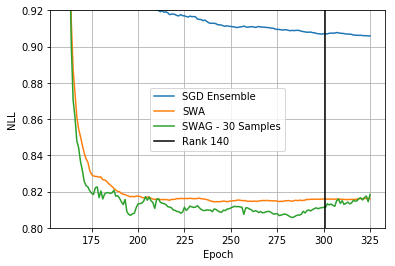

In [16]:
plt.plot(range(161, 326), ecdf_nll, label = 'SGD Ensemble')
#plt.plot(range(161, 325), ecdf_vals['sgd_loss'], label='SGD Ind.')
plt.plot(range(163, 326), swa_nll, label='SWA')
plt.plot(range(163, 326), swag_nll, label = 'SWAG - 30 Samples')
plt.axvline(x=161+140, c='black', label='Rank 140')

plt.legend()
plt.grid()
plt.ylim((0.8, 0.92))
plt.xlabel('Epoch')
plt.ylabel('NLL')
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/prn56_c100_nll_rank.pdf')

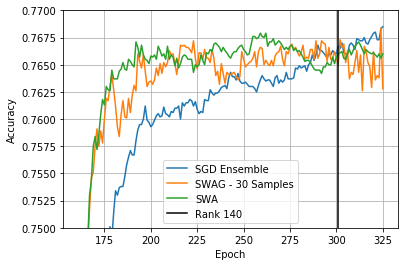

In [17]:
plt.plot(range(161, 326), ecdf_acc, label = 'SGD Ensemble')
#plt.plot(range(161, 325), ecdf_vals['sgd_acc']/100, label='SGD Ind.')
plt.plot(range(163, 326), swag_acc, label = 'SWAG - 30 Samples')
plt.plot(range(163, 326), swa_acc, label='SWA')

plt.axvline(x=161+140, c='black', label='Rank 140')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0.75, 0.77))
plt.grid()
plt.legend()
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/prn56_c100_acc_rank.pdf')

In [18]:
np.savez(file='/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/prn56_rank.npz',
        swag={'acc':swag_acc, 'nll':swag_nll},
        swa={'acc':swa_acc, 'nll':swa_nll},
        ecdf={'acc':ecdf_acc, 'nll': ecdf_nll},
        sgd={'acc':ecdf_vals['sgd_acc'], 'nll':ecdf_vals['sgd_loss']})

In [4]:
prior_results = np.load('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/prn56_rank.npz')

In [21]:
sgd_iterates = np.load('rank_experiment/sgd_ecdf_ensembles.npz')

In [22]:
sgd_ecdf_preds = sgd_iterates['predictions']
sgd_ecdf_targets = sgd_iterates['targets']

In [23]:
sgd_ecdf_nll = []
sgd_ecdf_acc = []
for i in range(sgd_ecdf_preds.shape[2]):
    current_predictions = sgd_ecdf_preds[:, :, 0:(i+1)].sum(2) / (i+1)
    
    sgd_ecdf_nll.append( nll( current_predictions , sgd_ecdf_targets) )
    sgd_ecdf_acc.append( (np.argmax(current_predictions, 1) == sgd_ecdf_targets).mean() )

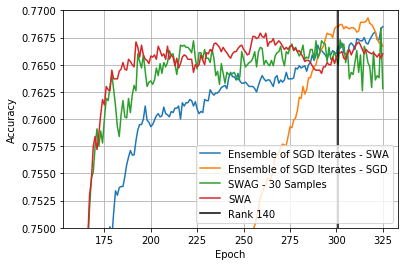

In [25]:
plt.plot(range(161, 326), prior_results['ecdf'].tolist()['acc'], label = 'Ensemble of SGD Iterates - SWA')
plt.plot(range(161, 326), sgd_ecdf_acc, label='Ensemble of SGD Iterates - SGD')
plt.plot(range(163, 326), prior_results['swag'].tolist()['acc'], label = 'SWAG - 30 Samples')
plt.plot(range(163, 326), prior_results['swa'].tolist()['acc'], label='SWA')

plt.axvline(x=161+140, c='black', label='Rank 140')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0.75, 0.77))
plt.grid()
plt.legend()

In [28]:
npz_locations = 'rank_experiment/swag_rank20/'
swag20_nll = []
swag20_acc = []
for epoch in range(163,326):
        npz_arr = np.load(npz_locations+str(epoch)+'.npz')
        swag20_nll.append( nll_from_arr(npz_arr) / 10000 )
        swag20_acc.append( accuracy(npz_arr))

9873.200
0.7145
9155.137
0.7315
8818.942
0.7403
8690.326
0.7441
8545.018
0.7471
8509.481
0.7487
8417.820
0.7518
8361.517
0.7517
8286.390
0.7565
8254.017
0.7577
8238.711
0.7576
8223.833
0.7573
8206.198
0.7576
8203.786
0.7583
8247.691
0.7570
8218.459
0.7586
8169.480
0.7600
8207.702
0.7596
8180.205
0.7593
8171.995
0.7603
8227.298
0.7601
8197.870
0.7604
8191.636
0.7600
8214.668
0.7596
8207.056
0.7590
8196.415
0.7591
8168.171
0.7594
8206.015
0.7610
8186.428
0.7573
8169.390
0.7612
8173.234
0.7598
8202.940
0.7613
8192.613
0.7577
8180.833
0.7599
8169.186
0.7616
8158.164
0.7619
8168.177
0.7606
8149.741
0.7612
8146.309
0.7621
8148.096
0.7639
8154.358
0.7611
8181.752
0.7610
8156.278
0.7644
8175.188
0.7631
8171.605
0.7608
8185.864
0.7642
8181.753
0.7633
8164.494
0.7629
8162.640
0.7656
8176.383
0.7649
8194.836
0.7631
8187.338
0.7614
8195.979
0.7621
8166.213
0.7618
8134.825
0.7638
8160.390
0.7645
8165.123
0.7625
8180.826
0.7622
8160.735
0.7621
8158.728
0.7613
8159.608
0.7626
8182.141
0.7636
8184.848

In [29]:
swag20_nll = np.array(swag20_nll)
swag20_acc = np.array(swag20_acc)

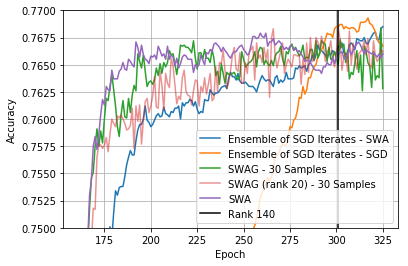

In [42]:
plt.plot(range(161, 326), prior_results['ecdf'].tolist()['acc'], label = 'Ensemble of SGD Iterates - SWA')
plt.plot(range(161, 326), sgd_ecdf_acc, label='Ensemble of SGD Iterates - SGD')
plt.plot(range(163, 326), prior_results['swag'].tolist()['acc'], label = 'SWAG - 30 Samples')
plt.plot(range(163, 326), swag20_acc, label = 'SWAG (rank 20) - 30 Samples',alpha=0.5)
plt.plot(range(163, 326), prior_results['swa'].tolist()['acc'], label='SWA')

plt.axvline(x=161+140, c='black', label='Rank 140')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0.75, 0.77))
plt.grid()
plt.legend()
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/prn56_c100_acc_rank.pdf')

In [43]:
np.savez(file='/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/prn56_rank_updated.npz',
        swag=prior_results['swag'],
        swa=prior_results['swa'],
        swa_sgd_ecdf=prior_results['ecdf'],
        sgd_swa=prior_results['sgd'],
        swag20={'acc':swag20_acc, 'nll':swag20_nll},
        sgd_sgd_ecdf={'acc':sgd_ecdf_acc, 'nll':sgd_ecdf_nll},
        sgd_sgd={'acc':sgd_iterates['sgd_acc']/100, 'nll':sgd_iterates['sgd_loss']})

In [34]:
sgd_iterates.keys()

['predictions', 'targets', 'sgd_acc', 'sgd_loss']